# Plots for validated Data 

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown
pd.option_context('display.max_columns', -1)
pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

/tmp/ipykernel_328620/1899440786.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import glob,imp,os,shutil


In [3]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('TRV1tt_data.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names#
dataDF

filename  mass.5000001  mass.5000521  \
0    run_423_MZp_3000_gAq_3.000000E-01.slha        3000.0       10000.0   
1    run_365_MZp_2800_gAq_1.297300E-01.slha        2800.0       10000.0   
2    run_341_MZp_2700_gAq_2.000000E-01.slha        2700.0       10000.0   
3    run_558_MZp_3500_gAq_3.000000E-01.slha        3500.0       10000.0   
4    run_609_MZp_3700_gAq_1.441080E-01.slha        3700.0       10000.0   
..                                      ...           ...           ...   
418  run_666_MZp_3900_gAq_3.000000E-01.slha        3900.0       10000.0   
419  run_415_MZp_3000_gAq_8.200000E-02.slha        3000.0       10000.0   
420  run_667_MZp_3900_gAq_5.000000E-01.slha        3900.0       10000.0   
421  run_855_MZp_4600_gAq_3.000000E-01.slha        4600.0       10000.0   
422  run_552_MZp_3500_gAq_1.100000E-01.slha        3500.0       10000.0   

     width.5000001  width.5000521  extpar.1  extpar.2  extpar.3  extpar.4  \
0         0.025699            0.0       0.0       1.5  0.300000       0.0   
1         0.004483            0.0       0.0       1.5  0.129730       0.0   
2         0.010272            0.0       0.0       1.5  0.200000       0.0   
3         0.030008            0.0       0.0       1.5  0.300000       0.0   
4         0.007322            0.0       0.0       1.5  0.144108       0.0   
..             ...            ...       ...       ...       ...       ...   
418       0.033453            0.0       0.0       1.5  0.300000       0.0   
419       0.001920            0.0       0.0       1.5  0.082000       0.0   
420       0.092925            0.0       0.0       1.5  0.500000       0.0   
421       0.039479            0.0       0.0       1.5  0.300000       0.0   
422       0.004034            0.0       0.0       1.5  0.110000       0.0   

     xsec13TeV(fb).5000001  ...  ExptRes.result0.TxNames  \
0                85.553500  ...                 [TRV1tt]   
1                25.109230  ...                 [TRV1tt]   
2                75.237050  ...                 [TRV1tt]   
3                28.790540  ...                 [TRV1tt]   
4                 4.356207  ...                 [TRV1tt]   
..                     ...  ...                      ...   
418              12.384695  ...                 [TRV1tt]   
419               6.391744  ...                 [TRV1tt]   
420              34.459970  ...                 [TRV1tt]   
421               2.893533  ...                 [TRV1tt]   
422               3.880966  ...                 [TRV1tt]   

     ExptRes.result0.Mass (GeV)  ExptRes.result0.AnalysisID  \
0                [(y1, 3000.0)]          ATLAS-EXOT-2018-48   
1                [(y1, 2800.0)]          ATLAS-EXOT-2018-48   
2                [(y1, 2700.0)]          ATLAS-EXOT-2018-48   
3                [(y1, 3500.0)]          ATLAS-EXOT-2018-48   
4                [(y1, 3700.0)]          ATLAS-EXOT-2018-48   
..                          ...                         ...   
418              [(y1, 3900.0)]          ATLAS-EXOT-2018-48   
419              [(y1, 3000.0)]          ATLAS-EXOT-2018-48   
420              [(y1, 3900.0)]          ATLAS-EXOT-2018-48   
421              [(y1, 4600.0)]          ATLAS-EXOT-2018-48   
422              [(y1, 3500.0)]          ATLAS-EXOT-2018-48   

     ExptRes.result0.DataSetID  ExptRes.result0.AnalysisSqrts (TeV)  \
0                         None                                 13.0   
1                         None                                 13.0   
2                         None                                 13.0   
3                         None                                 13.0   
4                         None                                 13.0   
..                         ...                                  ...   
418                       None                                 13.0   
419                       None                                 13.0   
420                       None                                 13.0   
421                  

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)
pd.set_option('display.float_format', '{:e}'.format)
#dataDF = dataDF[dataDF['extpar.3'] > 0.1].reset_index(drop=True)
dataDF

filename  mass.5000001  mass.5000521  \
0    run_423_MZp_3000_gAq_3.000000E-01.slha  3.000000e+03  1.000000e+04   
1    run_365_MZp_2800_gAq_1.297300E-01.slha  2.800000e+03  1.000000e+04   
..                                      ...           ...           ...   
421  run_855_MZp_4600_gAq_3.000000E-01.slha  4.600000e+03  1.000000e+04   
422  run_552_MZp_3500_gAq_1.100000E-01.slha  3.500000e+03  1.000000e+04   

     width.5000001  width.5000521     extpar.1     extpar.2     extpar.3  \
0     2.569856e-02   0.000000e+00 0.000000e+00 1.500000e+00 3.000000e-01   
1     4.483046e-03   0.000000e+00 0.000000e+00 1.500000e+00 1.297300e-01   
..             ...            ...          ...          ...          ...   
421   3.947884e-02   0.000000e+00 0.000000e+00 1.500000e+00 3.000000e-01   
422   4.034376e-03   0.000000e+00 0.000000e+00 1.500000e+00 1.100000e-01   

        extpar.4  xsec13TeV(fb).5000001   BRs.y1.q,q   BRs.y1.c,c  \
0   0.000000e+00           8.555350e+01 1.672149e-01 1.672148e-01   
1   0.000000e+00           2.510923e+01 1.672961e-01 1.672959e-01   
..           ...                    ...          ...          ...   
421 0.000000e+00           2.893533e+00 1.668999e-01 1.668998e-01   
422 0.000000e+00           3.880966e+00 1.670695e-01 1.670694e-01   

      BRs.y1.b,b  BRs.y1.t-,t+  totalxsec13TeV(fb)  totalxsec8TeV(fb)  \
0   1.672125e-01  1.639279e-01        8.555350e+01       0.000000e+00   
1   1.672932e-01  1.635227e-01        2.510923e+01       0.000000e+00   
..           ...           ...                 ...                ...   
421 1.668988e-01  1.655018e-01        2.893533e+00       0.000000e+00   
422 1.670677e-01  1.646545e-01        3.880966e+00       0.000000e+00   

                                     SMS Decomposition  \
0    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
1    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
..                                                 ...   
421  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
422  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   

     Total xsec for missing topologies (fb)  \
0                              7.152890e+01   
1                              2.100330e+01   
..                                      ...   
421                            2.414649e+00   
422                            3.241948e+00   

     Total xsec for missing topologies with displaced decays (fb)  \
0                                         0.000000e+00              
1                                         0.000000e+00              
..                                                 ...              
421                                       0.000000e+00              
422                                       0.000000e+00              

     Total xsec for missing topologies with prompt decays (fb)  \
0                                         8.555351e+01           
1                                         2.510923e+01           
..                                                 ...           
421                                       2.893534e+00           
422                                       3.880966e+00           

     Total xsec for topologies outside the grid (fb)  OutputStatus.sigmacut  \
0                                       0.000000e+00           0.000000e+00   
1                                       0.000000e+00           0.000000e+00   
..                                               ...                    ...   
421                                     0.000000e+00           0.000000e+00   
422                                     0.000000e+00           0.000000e+00   

     OutputStatus.minmassgap  OutputStatus.maxcond  OutputStatus.ncpus  \
0                         50          2.000000e-01                   1   
1                         50          2.000000e-01                   1   
..                       ...                   ...                 ...   
421                       50          2.000000e-01        

#### Set r = 0 for points with no results 

In [5]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [6]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [7]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 423
Total excluded (LHC) = 182
Total allowed = 241



### Create analysis label for excluded points

In [8]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


In [9]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(182, 59)


In [10]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

ATLAS-EXOT-2018-48 (TRV1tt): 182


In [17]:
Exp = pd.read_csv('/home/yoxara/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2018-48/orig/HEPData-ins1795076-v1-Figure_4_Expected.csv',skiprows=11)
MZp_exp = Exp['#Mass [TeV]']
MZp_Exp = [x * 1000 for x in MZp_exp]
xsec_Exp_pb = Exp['Cross section upper limit at 95% CL [pb]']
xsec_Exp_fb = [x * 1000 for x in xsec_Exp_pb]
Obs = pd.read_csv('/home/yoxara/smodels-database/13TeV/ATLAS/ATLAS-EXOT-2018-48/orig/HEPData-ins1795076-v1-Figure_4_Observed.csv',skiprows=11)
MZp_obs = Obs['#Mass [TeV]']
MZp_Obs = [x * 1000 for x in MZp_obs]
xsec_Obs_pb = Obs['Cross section upper limit at 95% CL [pb]']
xsec_Obs_fb = [x * 1000 for x in xsec_Obs_pb]

### Define colors and plotting order

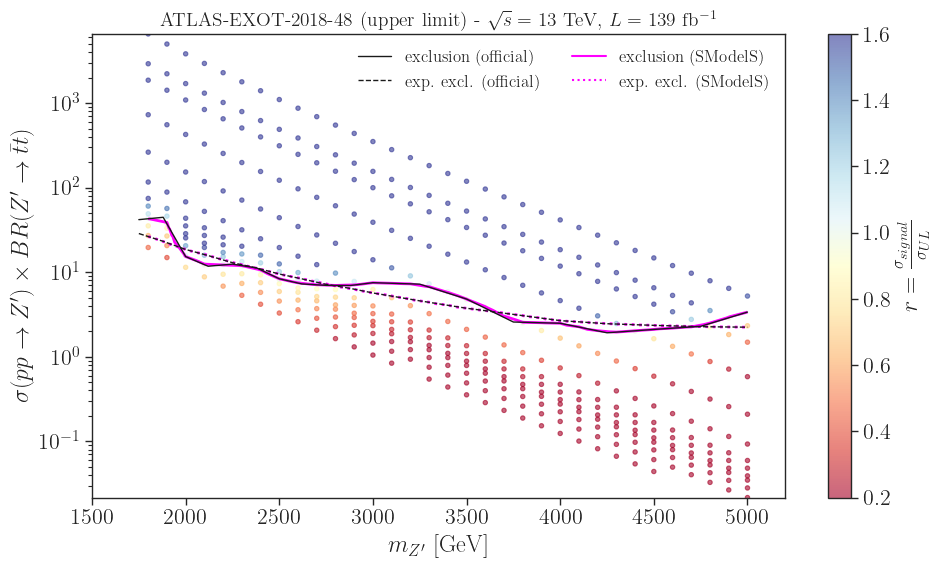

In [20]:
from scipy.interpolate import griddata
from matplotlib.ticker import FuncFormatter
cm = plt.colormaps['RdYlBu']
plt.figure(figsize=(10,6))
x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * ( dataDF['BRs.y1.t-,t+'])
c = dataDF['ExptRes.result0.r']
ce = dataDF['ExptRes.result0.r_expected']
order = c.argsort()
x, y, c, ce = x.iloc[order], y.iloc[order], c.iloc[order], ce.iloc[order]
sc = plt.scatter(x, y, c=c, s=10, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.6)
levels = [1.0]  
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
cs_exp = plt.tricontour(x, y, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2.)
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=1.5, linestyle='solid', label='exclusion (SModelS)')
smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=1.5, linestyle=':', label='exp. excl. (SModelS)')
MY1 = [1.75E+03, 1.88E+03, 2.00E+03, 2.12E+03, 2.25E+03, 2.38E+03, 2.50E+03, 2.62E+03, 2.75E+03, 2.88E+03, 3.00E+03, 3.25E+03, 3.50E+03, 3.75E+03, 4.00E+03, 4.25E+03, 4.50E+03, 4.75E+03, 5.00E+03]
xsecObs_pb = [0.04181840000, 0.04459930000, 0.01529800000, 0.01176220000, 0.01245740000, 0.01120730000, 0.00835983000, 0.00726837000, 0.00698695000, 0.00696223000, 0.00751606000, 0.00722279000, 0.00481429000, 0.00257596000, 0.00249053000, 0.00192146000, 0.00210467000, 0.00229133000, 0.00337559000]
xsecObs_fb = [x * 1000 for x in xsecObs_pb]
observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
xsecExp_pb = [0.02864800000, 0.02316800000, 0.01857600000, 0.01572760000, 0.01295390000, 0.01120420000, 0.00951264000, 0.00834519000, 0.00718414000, 0.00642573000, 0.00568206000, 0.00458504000, 0.00374739000, 0.00317052000, 0.00267618000, 0.00245943000, 0.00235223000, 0.00226970000, 0.00223679000]
xsecExp_fb = [x * 1000 for x in xsecExp_pb]
Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')  
plt.legend(handles=[observed_line, Expected_line, smodels_proxy, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{t} t)$')
plt.xlim(1500, 5200)
plt.yscale('log')
plt.title(r'ATLAS-EXOT-2018-48 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 139$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.savefig('ATLAS-EXOT-2018-48_xsec_UL.png')
plt.show()


In [13]:
dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.t-,t+'])


164   3.817400e+03
272   2.942548e+03
          ...     
283   2.812224e-02
361   2.164135e-02
Length: 423, dtype: float64

In [14]:
dataDF['ExptRes.result0.theory prediction (fb)']

164   3.817400e+03
272   2.942548e+03
          ...     
283   2.812224e-02
361   2.164135e-02
Name: ExptRes.result0.theory prediction (fb), Length: 423, dtype: float64

In [15]:
(dataDF['xsec13TeV(fb).5000001'] * ( dataDF['BRs.y1.t-,t+']))/dataDF['ExptRes.result0.upper limit (fb)']


164   2.495359e+02
272   2.359815e+02
          ...     
283   8.331058e-03
361   6.411130e-03
Length: 423, dtype: float64